
*   Check which data sets are still available/connectable
*   Table 1 (Number of databases from different cities)
*   Fig 1 (Number of databases from different citie)
*   FIG.2
*   FIG.3
*   TABLE2
*   Fig 4
*   FIG. 5.  (Distribution of data set views and downloads)
*   Fig 6
*   Fig 7
*   Fig 9
*   Number of databases created each year, updated each year, total created by that year (2014-2023)
*   Number of databases created each year, updated each year, total created by that year (All)
*   Original Paper (2014)" VS "New Study (2023)

In [1]:
import csv
import requests
from datetime import datetime
url = "https://api.us.socrata.com/api/catalog/v1"
domain = "data.cityofnewyork.us"
import pandas as pd

# # Read the content of the text file
# with open('urls.txt', 'r') as file:
#     data = file.read()

csv_file_path = 'fig1.csv'

with open(csv_file_path, mode ='r')as file:
  csvFile = csv.reader(file)

  # # Split the content into lines
  # lines = data.split('\n')

  # Create a dictionary to store URLs and city names
  city_data = {}

  # Iterate through each line and extract the URL and city name
  for lines in csvFile:
      # if line.strip():  # Check if the line is not empty
        # parts = line.split(' ')
        if lines[4] == "website":
           continue
        url_city = lines[4]
        city = lines[5]
        # url_city, city = line.split(' ')
        city_data[city] = url_city

  # Print the dictionary
  # print(city_data)


# print(url)
for k,v in city_data.items():
    try:
      params = {
      "domains": v,
      "search_context": v,
      "limit": 5000
      }
      response = requests.get(url, params=params)
      data = response.json()
      count = len(data["results"])
      print(str(k) + "\tCount:" + str(count))
      df = pd.read_csv(csv_file_path)

      city_name_to_update = str(k)
      new_database_num = int(count)

      df.loc[df['city name long'] == city_name_to_update, 'databases'] = new_database_num
      df.loc[df['city name long'] == city_name_to_update, 'yes'] = 1

      df.to_csv(csv_file_path, index=False)
    except Exception as e:
        print(str(k) + "\tERROR")
        df = pd.read_csv(csv_file_path)

        city_name_to_update = str(k)
        new_database_num = int(count)

        # df.loc[df['city name long'] == city_name_to_update, 'databases'] = int(0)
        df.loc[df['city name long'] == city_name_to_update, 'yes'] = int(0)
        df.to_csv(csv_file_path, index=False)


Austin, TX	Count:19
Baltimore, MD	ERROR
Chicago, IL	Count:1659
De Leon, TX	ERROR
Edmonton, AB	Count:2150
New Orleans, LA	Count:234
San Francisco, CA	Count:1205
Seattle, WA	Count:859
New York City, NY	Count:3441
Honolulu, HI	Count:358
Somerville, MA	Count:42
Boston, MA	ERROR
Salt Lake City, UT	ERROR
Oakland, CA	ERROR
Madison, WI	ERROR
Kansas City, MO	Count:416
Raleigh, NC	ERROR
Redmond, WA	Count:47
Weatherford, TX	ERROR
Wellington, FL	ERROR


In [2]:
import pandas as pd

# Sample data
data = {'City Name': [],
        'No. of data sets in 2023': [],
        'No. of data sets in 2014': [],
        'Change in No. of data sets': [],
        'Status':[],
        'Top_three categories':[]
       }

with open('fig1.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
      if lines[1] == "databases":
          continue
      if lines[1] == "0":
          data["Status"].append("Website disappeared")
          data["Top_three categories"].append("N/A")
      elif lines[3] == "0":
          data["Status"].append("Website not connectable")
          data["Top_three categories"].append("N/A")
      else:
          data["Status"].append("Website is working")
          url = "https://api.us.socrata.com/api/catalog/v1"
          domain = lines[4]

          params = {
              "domains": domain,
              "search_context": domain,
              "limit": 5000
          }

          response = requests.get(url, params=params)
          data2 = response.json()
          categories = {}
          for item in data2['results']:
              # print(item["classification"]["categories"])
              for c in item["classification"]["categories"]:
                if c in categories:
                    categories[c] += 1
                else:
                    categories[c] = 1
          # print(categories)
          sorted_data = sorted(categories.items(), key=lambda x: x[1], reverse=True)
          # print(sorted_data)
          top_three_names = [category for category, value in sorted_data[:3]]
          res = ','.join(top_three_names)
          data["Top_three categories"].append(res)

      data["City Name"].append(lines[5])
      data["No. of data sets in 2023"].append(int(lines[1]))
      data["No. of data sets in 2014"].append(int(lines[6]))
      data["Change in No. of data sets"].append(int(lines[1]) - int(lines[6]))

# Create a DataFrame
df = pd.DataFrame(data)

# Sort the DataFrame by the 'Age' column
df_sorted_desc = df.sort_values(by='No. of data sets in 2023', ascending=True)
df_sorted_desc = df_sorted_desc.reset_index(drop=True)
df_sorted_desc['S. No.'] = df_sorted_desc.index + 1
df_sorted_desc = df_sorted_desc[['S. No.', 'City Name', 'No. of data sets in 2023',"No. of data sets in 2014","Change in No. of data sets",'Top_three categories','Status']]
print(df_sorted_desc.to_string(index=False))


# df_sorted_desc.index = df_sorted_desc.index + 1



# print(df_sorted_desc)

 S. No.          City Name  No. of data sets in 2023  No. of data sets in 2014  Change in No. of data sets                          Top_three categories                  Status
      1     Wellington, FL                         0                        30                         -30                                           N/A     Website disappeared
      2    Weatherford, TX                         0                        71                         -71                                           N/A     Website disappeared
      3        De Leon, TX                         0                        12                         -12                                           N/A     Website disappeared
      4         Austin, TX                        19                       216                        -197                   health,economy,demographics      Website is working
      5 Salt Lake City, UT                        21                        39                         -18         

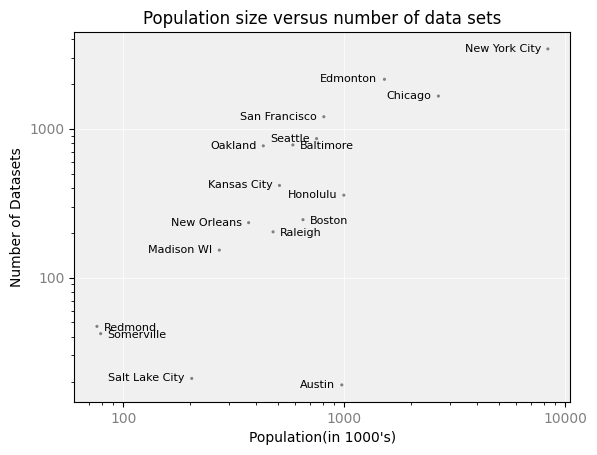

In [3]:
import csv
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

cities = []
population = []
datasets = []

with open('fig1.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
      if lines[1] == "databases":
          continue
      if lines[1] == "0":
          continue
      cities.append(lines[0])
      population.append(int(lines[2])  // 1000 )
      datasets.append(int(lines[1]))

plt.rcParams['axes.facecolor'] = '#f0f0f0'


# Create the scatter plot
plt.scatter(population, datasets, color='grey', label='Cities', s = 5, edgecolor='none', zorder=2)
# plt.scatter(population, datasets, color='grey', s = 5, edgecolor='none', zorder=2)

# Add labels and title
plt.xlabel("Population(in 1000\'s)")
plt.ylabel('Number of Datasets')
plt.title('Population size versus number of data sets')



# Add city names as annotations
for i, city in enumerate(cities):
    if city == "Baltimore" or city == "Boston" or city == "Raleigh" or city == "Somerville" or city == "Redmond":
      plt.annotate(city, (population[i], datasets[i]), textcoords="offset points", xytext=(5, -3), ha='left', fontsize = 8)

    else:
      plt.annotate(city, (population[i], datasets[i]), textcoords="offset points", xytext=(-5, -2), ha='right', fontsize = 8)



plt.xscale('log')
plt.yscale('log')

plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.xticks(color="grey")
plt.yticks(color="grey")
plt.grid( color='white', linestyle='-', linewidth=0.5)

plt.show()

In [59]:
domains = []
cities_short = []
with open('fig1.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
      if lines[4] == "website" or lines[3] == "0":
          continue
      else:
          domains.append(lines[4])
          cities_short.append(lines[0])
# print(domains)

In [44]:
##Extracting file type -- tabular vs other
##Part 1: This creates a txt file named "cityofnewyork_filetype.txt" in the same directory the jupyter notebook is in. The txt file contains data ID, data file type, and data type format for non-tabular data.
#https://dev.socrata.com/docs/other/discovery.html#?route=overview

import requests

for domain in domains:
  # Base URL for the Socrata Discovery API
  url = "https://api.us.socrata.com/api/catalog/v1"
  # domain = "data.cityofnewyork.us"
  filename = domain.split('.')[1] + "_filetype.txt"

  # Initialize parameters for pagination
  params = {
      "domains": domain,
      "limit": 100,  # Maximum number of results per page
      "offset": 0    # Start at the beginning
  }

  # Fetch and write data to the file
  with open(filename, 'w') as file:
      while True:
          response = requests.get(url, params=params)
          data = response.json()

          # Write each item to the file
          for item in data['results']:
              file.write(item['resource']['id'] + " - " + item['resource']['lens_view_type'] + " - " + str(item['resource']['blob_mime_type'])+"\n")

          # Check if there are more pages
          if len(data['results']) < params['limit']:
              break  # Exit loop if no more results to fetch

          # Increase the offset for the next iteration
          params['offset'] += params['limit']

Percentage of 'tabular' filetypes: 82.06%
Percentage of 'pdf' filetypes: 2.68%
Percentage of 'zip' filetypes: 5.93%
Percentage of 'other' filetypes: 9.32%


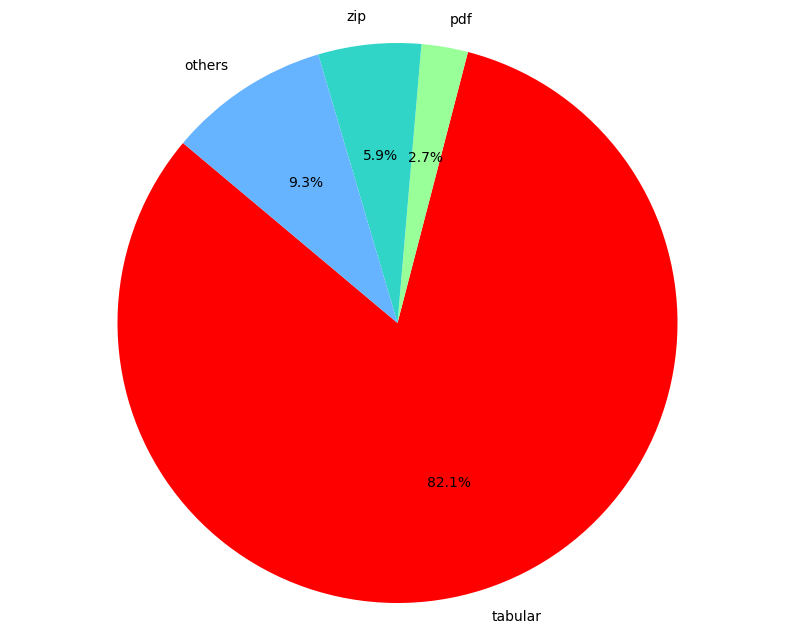

In [61]:
#This code snippet reads the info from the txt file created in part 1, and creates the pie chart using matplotlib:

import matplotlib.pyplot as plt

# Initialize counters
total_count = 0
tabular_count = 0
pdf_count = 0
zip_count = 0
other_count = 0

cities = []
tabular_city_percent=[]


i = 0
for domain in domains:

  filename = domain.split('.')[1] + "_filetype.txt"
  tabular_city_count = 0
  total_city_count = 0


  # Process each line in the file
  with open(filename, 'r') as file:
      for line in file:
          total_count += 1
          total_city_count += 1
          # Check if the line contains 'tabular'
          if 'tabular' in line:
              tabular_count += 1
              tabular_city_count +=1
          elif 'pdf' in line:
              pdf_count += 1
          elif 'zip' in line:
              zip_count += 1
          else:
              other_count += 1
      # print(tabular_count)
  cities.append(cities_short[i])
  tabular_city_percent.append(int(tabular_city_count)/int(total_city_count))
  i += 1
i = 0

# Calculate the percentage (avoid division by zero)
tabular_percentage = (tabular_count / total_count * 100) if total_count else 0
zip_percentage = (zip_count / total_count * 100) if total_count else 0
pdf_percentage = (pdf_count / total_count * 100) if total_count else 0
other_percentage = (other_count / total_count * 100) if total_count else 0

# Print the result
print(f"Percentage of 'tabular' filetypes: {tabular_percentage:.2f}%")
print(f"Percentage of 'pdf' filetypes: {pdf_percentage:.2f}%")
print(f"Percentage of 'zip' filetypes: {zip_percentage:.2f}%")
print(f"Percentage of 'other' filetypes: {other_percentage:.2f}%")

# Labels for the sections
labels = ['tabular', 'pdf', 'zip', 'others']

# Sizes for each section
sizes = [tabular_percentage, pdf_percentage, zip_percentage, other_percentage]

# Colors for each section
colors = ['#ff0000','#99ff99','#30D5C8','#66b3ff']

# Explode the 1st slice (Tabular)
explode = (0, 0, 0, 0)

plt.figure(figsize=(10, 8))
# Create pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()

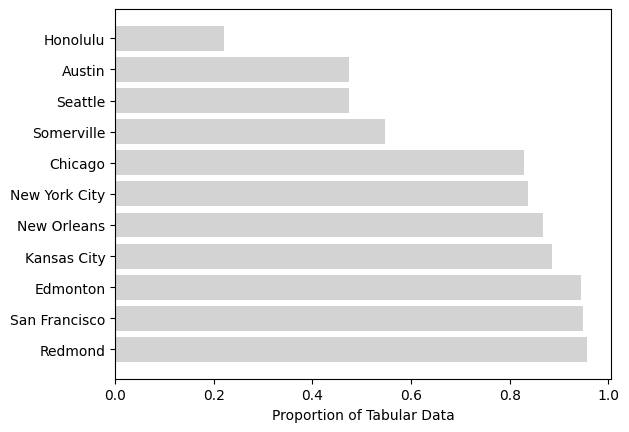

In [76]:
# print(cities)
# print(tabular_city_percent)
# Zip and sort the data based on tabular_city_percent
sorted_data = sorted(zip(tabular_city_percent, cities), reverse=True)
sorted_tabular_city_percent, sorted_cities = zip(*sorted_data)

# Creating a bar chart
plt.rcParams['axes.facecolor'] = 'white'
plt.barh(sorted_cities, sorted_tabular_city_percent, color="lightgrey")

# Adding labels and title
plt.xlabel('Proportion of Tabular Data')
# plt.ylabel('City')
# plt.title('Propotion of data in tabular format')

# Display the chart
plt.show()

In [55]:
for domain in domains:
    with open(domain.split('.')[1] + '_ids.txt','w') as output_file:
        with open(domain.split('.')[1] + "_filetype.txt", 'r') as file:
            for lines in file:
                # print(lines.split(' - ')[0])
                output_file.write(lines.split(' - ')[0] + "\n")

In [103]:
##Part 1 -- This code will take all NYC city ids from 'cityofnewyork_ids.txt' and generate a new ## txt file named 'cityofnewyork_rows_count.txt') -- to save you time I have attached it in the
## email. so you can just run part 2

import requests

for domain in domains:

    filename = domain.split('.')[1] + '_ids.txt'

    with open(domain.split('.')[1] + '_rows_count.txt','w') as output_file:
        with open(filename, 'r') as file:
            lines = file.readlines()

        for line in lines:
            report_id = line.strip()
            url = f"https://{domain}/resource/{report_id}.json?$select=count(*)"
            # print(url)
            try:
                response = requests.get(url)
                if response.status_code == 200:
                    data = response.json()

                    if data and 'count' in data[0]:
                        count = data[0]['count']
                        # print(count)
                        output_file.write(f"{report_id} - {count}\n")
                    else:
                        output_file.write(f"{report_id} - Count Not Applicable\n")
                        # print("ERROR")
                else:
                    output_file.write(f"{report_id} - Error {response.status_code}\n")
                    # print("ERROR2")
            except Exception as e:
                output_file.write(f"{report_id} - Exception: {str(e)}\n")
                # print("ERROR3")

In [104]:
##Part 2 generating statistics

_1k = 0
_10k = 0
_100k = 0
_1m = 0
_10m = 0
_more = 0
total = 0

for domain in domains:

  with open(domain.split('.')[1]+'_rows_count.txt','r') as input_file:
      lines = input_file.readlines()
      for line in lines:
          entry = line.strip()
          if 'Error' in entry or 'Exception' in entry or 'Count' in entry:
              continue
          count = int(entry.split(' - ')[1])
          total += 1
          if count <= 1000:
              _1k += 1
          elif count <= 10000:
              _10k += 1
          elif count <= 100000:
              _100k += 1
          elif count <= 1000000:
              _1m += 1
          elif count <= 10000000:
              _10m += 1
          else:
              _more += 1

print(f"{'0 - 1K':<10}\t{_1k:<5}\t{(_1k/total * 100):.2f}%")
print(f"{'1K - 10K':<10}\t{_10k:<5}\t{(_10k/total * 100):.2f}%")
print(f"{'10K - 100K':<10}\t{_100k:<5}\t{(_100k/total * 100):.2f}%")
print(f"{'100K - 1M':<10}\t{_1m:<5}\t{(_1m/total * 100):.2f}%")
print(f"{'1M - 10M':<10}\t{_10m:<5}\t{(_10m/total * 100):.2f}%")
print(f"{'>10M':<10}\t{_more:<5}\t{(_more/total * 100):.2f}%")

0 - 1K    	4138 	48.99%
1K - 10K  	1966 	23.27%
10K - 100K	904  	10.70%
100K - 1M 	611  	7.23%
1M - 10M  	712  	8.43%
>10M      	116  	1.37%


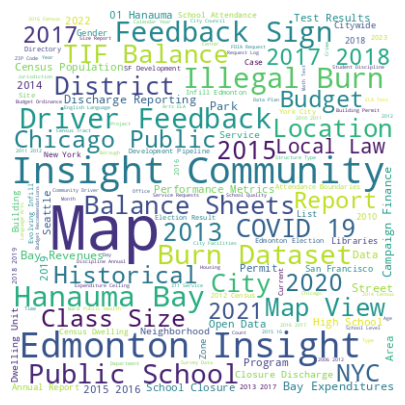

In [105]:
import requests
from datetime import datetime
from dateutil.relativedelta import relativedelta
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from itertools import chain

keywords =""
for domain in domains:
  url = "https://api.us.socrata.com/api/catalog/v1"
  # domain = "data.cityofnewyork.us"


  params = {
      "domains": domain,
      "search_context": domain,
      "limit": 5000
  }

  response = requests.get(url, params=params)
  data = response.json()

  for item in data['results']:
    keyword = item['resource']['name']
    keywords += keyword +" "
  # print(keywords)

# Create a WordCloud object
wordcloud = WordCloud(width=400, height=400, background_color='white', include_numbers = True).generate(keywords)

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

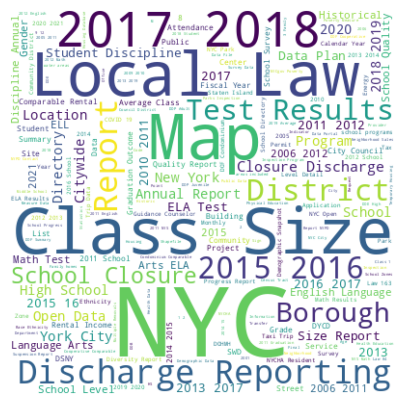

In [106]:
import requests
from datetime import datetime
from dateutil.relativedelta import relativedelta
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from itertools import chain
url = "https://api.us.socrata.com/api/catalog/v1"
domain = "data.cityofnewyork.us"
keywords =""

params = {
    "domains": domain,
    "search_context": domain,
    "limit": 5000
}

response = requests.get(url, params=params)
data = response.json()

for item in data['results']:
  keyword = item['resource']['name']
  keywords += keyword +" "
# print(keywords)

# Create a WordCloud object
wordcloud = WordCloud(width=400, height=400, background_color='white', include_numbers = True).generate(keywords)

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

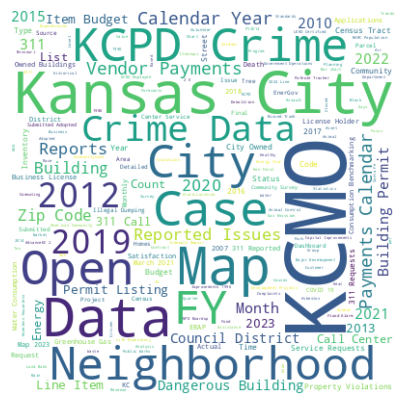

In [107]:
import requests
from datetime import datetime
from dateutil.relativedelta import relativedelta
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from itertools import chain
url = "https://api.us.socrata.com/api/catalog/v1"
domain = "data.kcmo.org"
keywords =""

params = {
    "domains": domain,
    "search_context": domain,
    "limit": 5000
}

response = requests.get(url, params=params)
data = response.json()

for item in data['results']:
  keyword = item['resource']['name']
  keywords += keyword +" "
# print(keywords)

# Create a WordCloud object
wordcloud = WordCloud(width=400, height=400, background_color='white', include_numbers = True).generate(keywords)

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

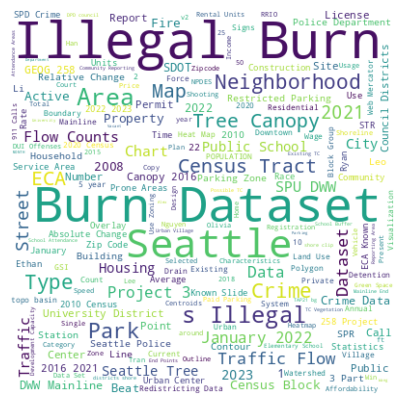

In [108]:
import requests
from datetime import datetime
from dateutil.relativedelta import relativedelta
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from itertools import chain
url = "https://api.us.socrata.com/api/catalog/v1"
domain = "data.seattle.gov"
keywords =""

params = {
    "domains": domain,
    "search_context": domain,
    "limit": 5000
}

response = requests.get(url, params=params)
data = response.json()

for item in data['results']:
  keyword = item['resource']['name']
  keywords += keyword +" "
# print(keywords)

# Create a WordCloud object
wordcloud = WordCloud(width=400, height=400, background_color='white', include_numbers = True).generate(keywords)

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

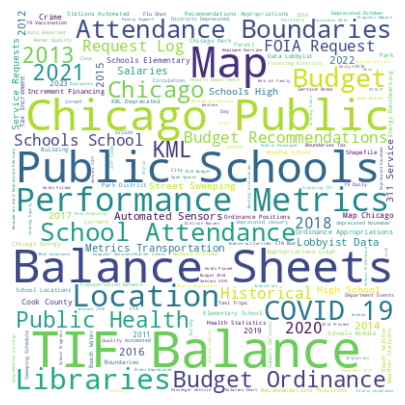

In [110]:
import requests
from datetime import datetime
from dateutil.relativedelta import relativedelta
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from itertools import chain
url = "https://api.us.socrata.com/api/catalog/v1"
domain = "data.cityofchicago.org"
keywords =""

params = {
    "domains": domain,
    "search_context": domain,
    "limit": 5000
}

response = requests.get(url, params=params)
data = response.json()

for item in data['results']:
  keyword = item['resource']['name']
  keywords += keyword +" "
# print(keywords)

# Create a WordCloud object
wordcloud = WordCloud(width=400, height=400, background_color='white', include_numbers = True).generate(keywords)

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

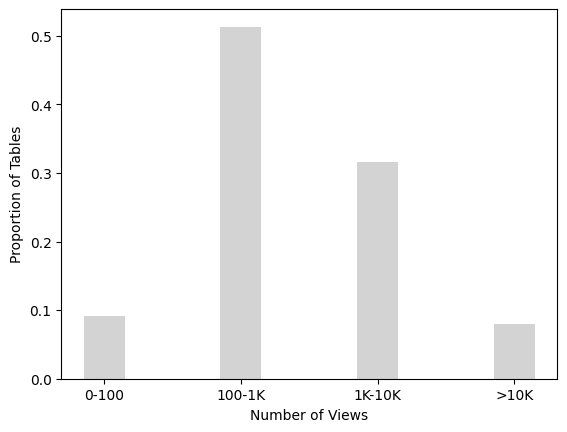

In [35]:
import pandas as pd

data = {'0-100': 0,
        '100-1K': 0,
        '1K-10K': 0,
        '>10K': 0,
       }
count = 0

with open('fig1.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
      if lines[1] == "databases":
          continue
      if lines[3] == "0":
          continue
      else:
          url = "https://api.us.socrata.com/api/catalog/v1"
          domain = lines[4]
          # print(domain)
          params = {
              "domains": domain,
              "search_context": domain,
              "limit": 5000
          }

          response = requests.get(url, params=params)
          data2 = response.json()
          for item in data2['results']:
              if item['resource']['page_views']['page_views_total'] <= 100:
                  data['0-100'] += 1
              elif item['resource']['page_views']['page_views_total'] <= 1000:
                  data['100-1K'] += 1
              elif item['resource']['page_views']['page_views_total'] <= 10000:
                  data['1K-10K'] += 1
              else:
                  data['>10K'] += 1
              count += 1
      # print(data)


# print(data)
categories = []
values = []
for k,v in data.items():
  categories.append(k)
  values.append(v / count)

# Creating a bar chart
plt.rcParams['axes.facecolor'] = 'white'
plt.bar(categories, values, color='lightgrey', width = 0.3)

# Adding labels and title
plt.xlabel('Number of Views')
plt.ylabel('Proportion of Tables')

# Display the chart
plt.show()


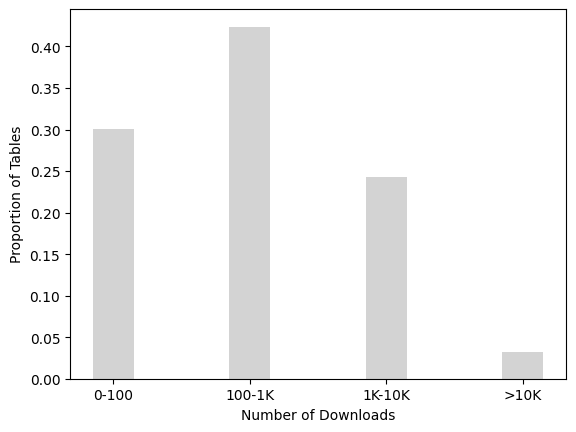

In [36]:
import pandas as pd

data = {'0-100': 0,
        '100-1K': 0,
        '1K-10K': 0,
        '>10K': 0,
       }
count = 0

with open('fig1.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
      if lines[1] == "databases":
          continue
      if lines[3] == "0":
          continue
      else:
          url = "https://api.us.socrata.com/api/catalog/v1"
          domain = lines[4]
          # print(domain)
          params = {
              "domains": domain,
              "search_context": domain,
              "limit": 5000
          }

          response = requests.get(url, params=params)
          data2 = response.json()
          for item in data2['results']:
              if item['resource']['download_count'] <= 100:
                  data['0-100'] += 1
              elif item['resource']['download_count'] <= 1000:
                  data['100-1K'] += 1
              elif item['resource']['download_count'] <= 10000:
                  data['1K-10K'] += 1
              else:
                  data['>10K'] += 1
              count += 1
      # print(data)


# print(data)
categories = []
values = []
for k,v in data.items():
  categories.append(k)
  values.append(v / count)

# Creating a bar chart
plt.rcParams['axes.facecolor'] = 'white'
plt.bar(categories, values, color='lightgrey', width = 0.3)

# Adding labels and title
plt.xlabel('Number of Downloads')
plt.ylabel('Proportion of Tables')

# Display the chart
plt.show()


In [113]:
import requests
from datetime import datetime
from dateutil.relativedelta import relativedelta
url = "https://api.us.socrata.com/api/catalog/v1"
# domain = "data.cityofnewyork.us"
months_count = {}
download_counts = []
for domain in domains:
  params = {
      "domains": domain,
      "search_context": domain,
      "limit": 5000
  }

  response = requests.get(url, params=params)
  data = response.json()
  today = datetime.today()
  for item in data['results']:
      download_counts.append(item['resource']['download_count'])



[1076, 1525, 1050, 902, 1411, 983, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14127310, 41323, 702948, 89377, 81200, 1243, 57824, 136563, 5753, 22499, 83190, 18854, 19670, 60370, 24146, 31979, 209250, 2540, 2027, 18, 39132, 21, 47320, 32, 28265, 24057, 17319, 1418, 34419, 63607, 4135, 23687, 56503, 42695, 1473238, 25311, 16950, 54705, 3424, 4620, 63192, 7266, 26846, 874, 22816, 75012, 22198, 19110, 10451, 22385, 14615, 9503, 10114, 4593, 7991, 6467, 20416, 3080, 9642, 9555, 1811808, 10132, 10535, 15259, 2736, 18143, 14829, 16676, 7313, 18384, 38106, 2631, 4122, 11695, 295738, 2847, 2735, 1582, 9640, 143803, 4162, 3993, 47853, 1081, 2984, 7237, 70078, 11032, 16292, 5894, 5653, 9983, 8385, 19867, 3563, 22098, 6551, 12176, 31, 4673, 14, 13658, 5086, 34, 12485, 2958, 9644, 5660, 2287, 2393, 24845, 2290, 6437, 2631, 8885, 6948, 2191, 7136, 1206, 10413, 4492, 3085, 11, 6053, 4728, 7140, 6605, 6188, 5743, 3647, 29973, 8, 4349, 11376, 10141, 5191, 3852, 55828, 10043, 7728, 4922, 9, 1255, 5729, 758

In [117]:
# print(download_counts)
sorted_download_counts = sorted(download_counts, reverse=True)
# print(sorted_download_counts)
top_100_threshold = sorted_download_counts[100]
top_500_threshold = sorted_download_counts[500]
top_1000_threshold = sorted_download_counts[1000]

[1076, 1525, 1050, 902, 1411, 983, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14127310, 41323, 702948, 89377, 81200, 1243, 57824, 136563, 5753, 22499, 83190, 18854, 19670, 60370, 24146, 31979, 209250, 2540, 2027, 18, 39132, 21, 47320, 32, 28265, 24057, 17319, 1418, 34419, 63607, 4135, 23687, 56503, 42695, 1473238, 25311, 16950, 54705, 3424, 4620, 63192, 7266, 26846, 874, 22816, 75012, 22198, 19110, 10451, 22385, 14615, 9503, 10114, 4593, 7991, 6467, 20416, 3080, 9642, 9555, 1811808, 10132, 10535, 15259, 2736, 18143, 14829, 16676, 7313, 18384, 38106, 2631, 4122, 11695, 295738, 2847, 2735, 1582, 9640, 143803, 4162, 3993, 47853, 1081, 2984, 7237, 70078, 11032, 16292, 5894, 5653, 9983, 8385, 19867, 3563, 22098, 6551, 12176, 31, 4673, 14, 13658, 5086, 34, 12485, 2958, 9644, 5660, 2287, 2393, 24845, 2290, 6437, 2631, 8885, 6948, 2191, 7136, 1206, 10413, 4492, 3085, 11, 6053, 4728, 7140, 6605, 6188, 5743, 3647, 29973, 8, 4349, 11376, 10141, 5191, 3852, 55828, 10043, 7728, 4922, 9, 1255, 5729, 758

In [119]:
import requests
from datetime import datetime
from dateutil.relativedelta import relativedelta

keywords_100 = ""
keywords_500 = ""
keywords_1000 = ""
url = "https://api.us.socrata.com/api/catalog/v1"
# domain = "data.cityofnewyork.us"
months_count = {}
download_counts = []
for domain in domains:
  params = {
      "domains": domain,
      "search_context": domain,
      "limit": 5000
  }

  response = requests.get(url, params=params)
  data = response.json()
  today = datetime.today()
  for item in data['results']:
      if (item['resource']['download_count']) > top_1000_threshold:
        keywords_1000 += item['resource']['name'] + " "
      if (item['resource']['download_count']) > top_500_threshold:
        keywords_500 += item['resource']['name'] + " "
      if (item['resource']['download_count']) > top_100_threshold:
        keywords_100 += item['resource']['name'] + " "



In [120]:
print(keywords_1000)
print(keywords_500)
print(keywords_100)

Current Employee Names, Salaries, and Position Titles Crimes - Map Crimes - 2001 to Present Building Permits Business Licenses - Current Active Affordable Rental Housing Developments Food Inspections Lobbyist Data - Historical - Lobbyist Registry - 2010 Traffic Crashes - Crashes Boundaries - Community Areas (current) Chicago Street Names Police Stations Census Data - Selected socioeconomic indicators in Chicago, 2008 – 2012 City-Owned Land Inventory Building Violations Business Licenses Chicago Public Schools - Progress Report Cards (2011-2012) Public Chauffeurs Taxi Trips Towed Vehicles Fire Stations Contracts Chicago Police Department - Illinois Uniform Crime Reporting (IUCR) Codes Ordinance Violations (Buildings) Libraries - Locations,  Contact Information, and Usual Hours of Operation Crimes - One year prior to present COVID-19 Daily Cases, Deaths, and Hospitalizations 311 Service Requests - Vacant and Abandoned Buildings Reported - Historical Sex Offenders Public Passenger Vehicle

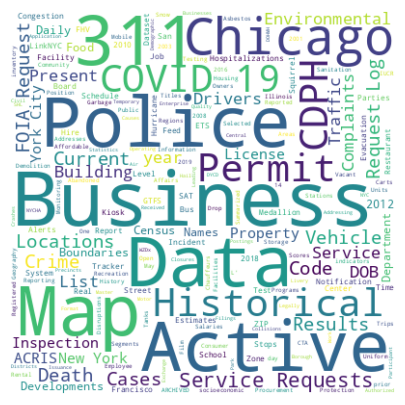

In [121]:
# Create a WordCloud object
wordcloud = WordCloud(width=400, height=400, background_color='white', include_numbers = True).generate(keywords_100)

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

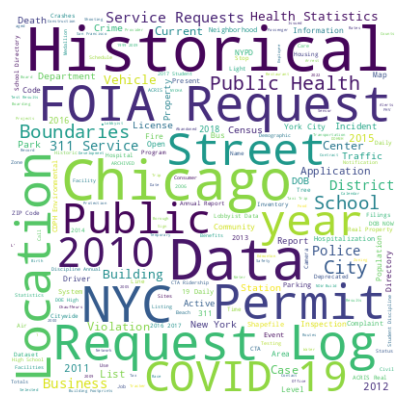

In [122]:
# Create a WordCloud object
wordcloud = WordCloud(width=400, height=400, background_color='white', include_numbers = True).generate(keywords_500)

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

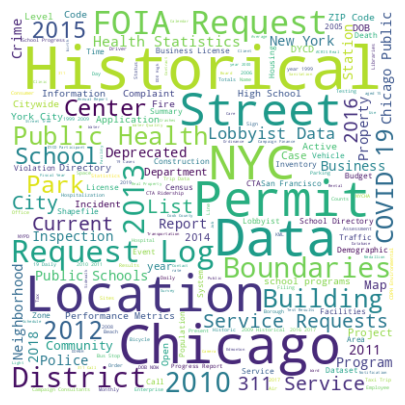

In [123]:
# Create a WordCloud object
wordcloud = WordCloud(width=400, height=400, background_color='white', include_numbers = True).generate(keywords_1000)

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

In [97]:
import requests
from datetime import datetime
from dateutil.relativedelta import relativedelta
url = "https://api.us.socrata.com/api/catalog/v1"
# domain = "data.cityofnewyork.us"
months_count = {}

for domain in domains:
  params = {
      "domains": domain,
      "search_context": domain,
      "limit": 5000
  }

  response = requests.get(url, params=params)
  data = response.json()
  # print(data)
  today = datetime.today()
  # print(today)

  year_count = {}
  count = 0;
  for item in data['results']:
      date = datetime.fromisoformat(item['resource']['createdAt'].replace('Z', '000'))
      # print(date)
      delta = relativedelta(today, date)
      # print(delta)
      months_between = delta.years * 12 + delta.months
      if months_between in months_count:
        months_count[months_between] += 1
      else:
        months_count[months_between] = 1
# print(months_count)



{63: 217, 91: 43, 77: 39, 25: 88, 24: 65, 1: 169, 146: 288, 143: 23, 90: 63, 128: 95, 148: 61, 150: 177, 73: 62, 131: 26, 155: 39, 137: 31, 145: 59, 35: 96, 144: 35, 30: 96, 130: 78, 42: 56, 106: 27, 87: 123, 43: 34, 114: 16, 118: 16, 133: 8, 104: 32, 110: 15, 41: 41, 126: 30, 102: 67, 138: 28, 62: 84, 147: 110, 105: 59, 112: 39, 122: 33, 111: 75, 140: 20, 71: 119, 163: 24, 79: 75, 69: 81, 75: 74, 84: 82, 99: 45, 121: 58, 59: 119, 127: 64, 31: 57, 68: 122, 134: 32, 124: 36, 47: 60, 93: 54, 18: 48, 113: 66, 135: 28, 142: 23, 34: 108, 86: 55, 95: 52, 83: 46, 123: 27, 100: 97, 32: 60, 80: 61, 58: 74, 154: 3, 23: 75, 96: 38, 139: 6, 132: 7, 125: 13, 149: 87, 74: 125, 45: 73, 76: 156, 141: 27, 120: 55, 103: 32, 94: 42, 101: 62, 46: 38, 116: 50, 8: 42, 97: 37, 119: 30, 11: 42, 98: 45, 40: 58, 108: 32, 64: 67, 21: 136, 89: 27, 152: 2, 52: 91, 56: 133, 109: 40, 27: 28, 33: 89, 81: 50, 51: 52, 53: 95, 49: 47, 115: 27, 14: 38, 57: 76, 44: 38, 65: 40, 129: 116, 61: 93, 88: 126, 15: 142, 136: 91, 

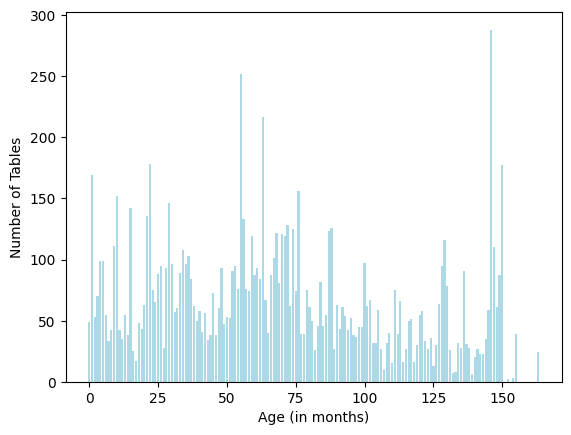

In [102]:
# Sort the dictionary based on values (counts)
sorted_months_count = dict(sorted(months_count.items(), key=lambda x: x[1], reverse=True))

# Extract the sorted keys and values
sorted_dates = list(sorted_months_count.keys())
sorted_counts = list(sorted_months_count.values())

# Plot the data
plt.bar(sorted_dates, sorted_counts, color="lightblue")

# Adding labels and title
plt.xlabel('Age (in months)')
plt.ylabel('Number of Tables')
# plt.title('Counts by Month')

# Display the plot
plt.show()

In [124]:
import requests
from datetime import datetime
from dateutil.relativedelta import relativedelta
url = "https://api.us.socrata.com/api/catalog/v1"
# domain = "data.cityofnewyork.us"
attributes_count = []
for domain in domains:
  params = {
      "domains": domain,
      "search_context": domain,
      "limit": 5000
  }

  response = requests.get(url, params=params)
  data = response.json()
  for item in data['results']:
      attributes_count.append(len(item['resource']['columns_name']))

In [128]:
total_tables = len(attributes_count)
a0_10 = 0
a10_20 = 0
a20_30 = 0
a30_40 = 0
a40 = 0
for item in attributes_count:
  if item <= 10:
    a0_10 += 1
  elif item <= 20:
    a10_20 += 1
  elif item <= 30:
    a20_30 += 1
  elif item <= 40:
    a30_40 += 1
  else:
    a40 += 1
x=["0-10", "10-20", "20-30", "30-40", ">40"]
y=[a0_10 / total_tables, a10_20 / total_tables, a20_30 / total_tables, a30_40 / total_tables, a40 / total_tables]

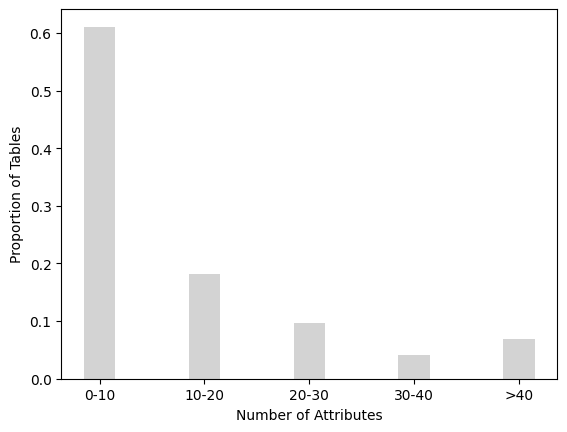

In [130]:
# Creating a bar chart
plt.rcParams['axes.facecolor'] = 'white'
plt.bar(x, y, color='lightgrey', width = 0.3)

# Adding labels and title
plt.xlabel('Number of Attributes')
plt.ylabel('Proportion of Tables')

# Display the chart
plt.show()

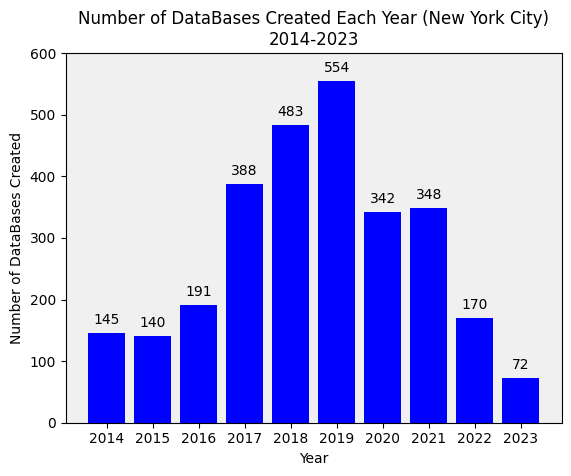

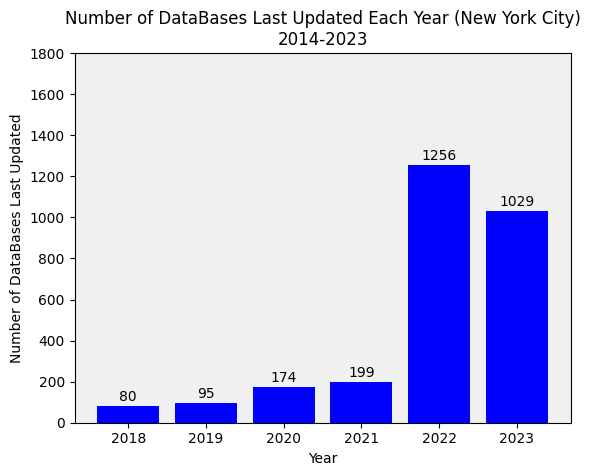

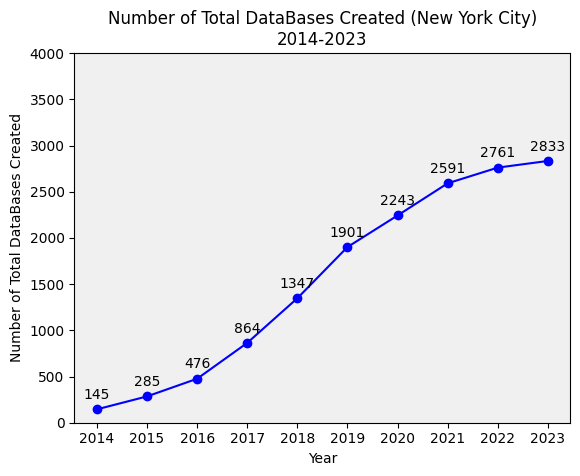

In [6]:
import requests
from datetime import datetime
url = "https://api.us.socrata.com/api/catalog/v1"
domain = "data.cityofnewyork.us"

params = {
    "domains": domain,
    "search_context": domain,
    "limit": 5000
}

response = requests.get(url, params=params)
data = response.json()

# print(data)

year_count = {}
year2_count = {}
count = 0;
for item in data['results']:
    year = datetime.fromisoformat(item['resource']['createdAt'].replace('Z', '+00:00')).year
    year2 = datetime.fromisoformat(item['resource']['updatedAt'].replace('Z', '+00:00')).year
    if year >= 2014 and year <= 2023:
        if year in year_count:
            year_count[year] += 1
        else:
            year_count[year] = 1
        if year2 in year2_count:
            year2_count[year2] += 1
        else:
            year2_count[year2] = 1
        count = count + 1
# print (year_count)
# print(count)

import matplotlib.pyplot as plt
years = list(year_count.keys())
counts = list(year_count.values())
all_years = range(min(year_count.keys()), max(year_count.keys()) + 1)
plt.xticks(all_years)
plt.bar(years, counts, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of DataBases Created')
plt.title('Number of DataBases Created Each Year (New York City)'+ '\n' + "2014-2023")
for year, count in zip(years, counts):
    plt.text(year, count + 10, str(count), ha='center', va='bottom')
plt.ylim(0,600)
plt.show()

years = list(year2_count.keys())
counts = list(year2_count.values())
all_years = range(min(year_count.keys()), max(year_count.keys()) + 1)
plt.xticks(all_years)
plt.bar(years, counts, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of DataBases Last Updated')
plt.title('Number of DataBases Last Updated Each Year (New York City)' + '\n' + "2014-2023")
for year, count in zip(years, counts):
    plt.text(year, count + 10, str(count), ha='center', va='bottom')
plt.ylim(0,1800)
plt.show()

all_years = range(min(year_count.keys()), max(year_count.keys()) + 1)
plt.xticks(all_years)
sorted_years = sorted(year_count.keys())
accumulated_sum = [sum(year_count[year] for year in sorted_years[:i+1]) for i in range(len(sorted_years))]
plt.plot(sorted_years, accumulated_sum, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Number of Total DataBases Created')
plt.title('Number of Total DataBases Created (New York City)' + '\n' + "2014-2023")
for year, total_count in zip(sorted_years, accumulated_sum):
    plt.text(year, total_count + 80, str(total_count), ha='center', va='bottom')
plt.ylim(0,4000)
plt.show()

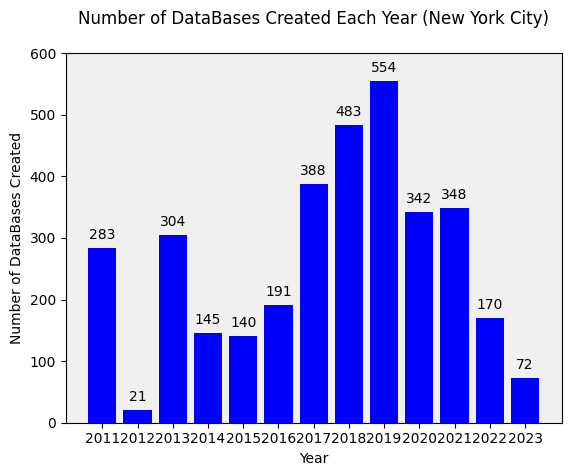

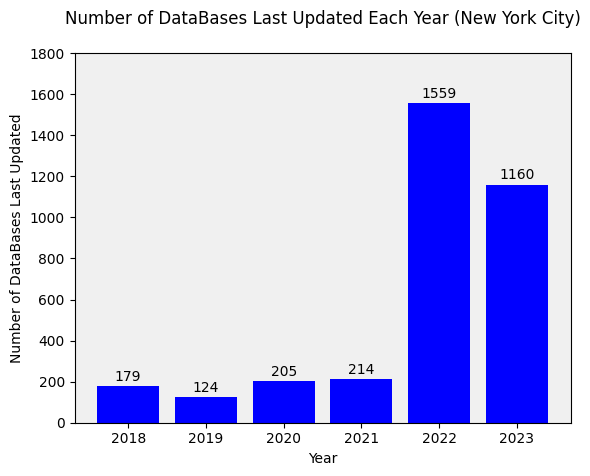

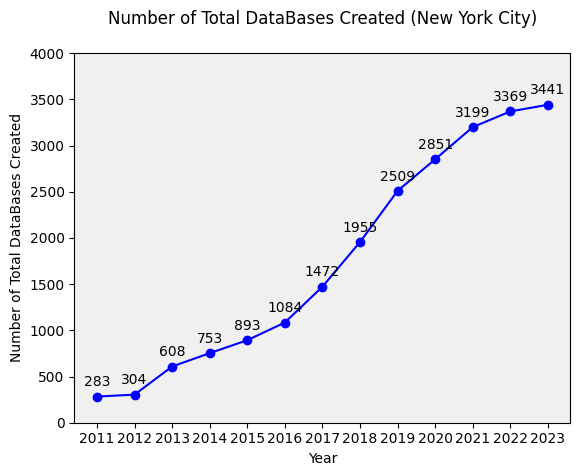

In [7]:
import requests
from datetime import datetime
url = "https://api.us.socrata.com/api/catalog/v1"
domain = "data.cityofnewyork.us"

params = {
    "domains": domain,
    "search_context": domain,
    "limit": 5000
}

response = requests.get(url, params=params)
data = response.json()

year_count = {}
year2_count = {}
count = 0;
for item in data['results']:
    year = datetime.fromisoformat(item['resource']['createdAt'].replace('Z', '+00:00')).year
    year2 = datetime.fromisoformat(item['resource']['updatedAt'].replace('Z', '+00:00')).year
    if year in year_count:
        year_count[year] += 1
    else:
        year_count[year] = 1
    if year2 in year2_count:
        year2_count[year2] += 1
    else:
        year2_count[year2] = 1
    count = count + 1
# print (year_count)
# print(count)

import matplotlib.pyplot as plt
years = list(year_count.keys())
counts = list(year_count.values())
all_years = range(min(year_count.keys()), max(year_count.keys()) + 1)
plt.xticks(all_years)
plt.bar(years, counts, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of DataBases Created')
plt.title('Number of DataBases Created Each Year (New York City)'+ '\n')
for year, count in zip(years, counts):
    plt.text(year, count + 10, str(count), ha='center', va='bottom')
plt.ylim(0,600)
plt.show()

years = list(year2_count.keys())
counts = list(year2_count.values())
all_years = range(min(year_count.keys()), max(year_count.keys()) + 1)
plt.xticks(all_years)
plt.bar(years, counts, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of DataBases Last Updated')
plt.title('Number of DataBases Last Updated Each Year (New York City)' + '\n')
for year, count in zip(years, counts):
    plt.text(year, count + 10, str(count), ha='center', va='bottom')
plt.ylim(0,1800)
plt.show()

all_years = range(min(year_count.keys()), max(year_count.keys()) + 1)
plt.xticks(all_years)
sorted_years = sorted(year_count.keys())
accumulated_sum = [sum(year_count[year] for year in sorted_years[:i+1]) for i in range(len(sorted_years))]
plt.plot(sorted_years, accumulated_sum, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Number of Total DataBases Created')
plt.title('Number of Total DataBases Created (New York City)' + '\n')
for year, total_count in zip(sorted_years, accumulated_sum):
    plt.text(year, total_count + 80, str(total_count), ha='center', va='bottom')
plt.ylim(0,4000)
plt.show()

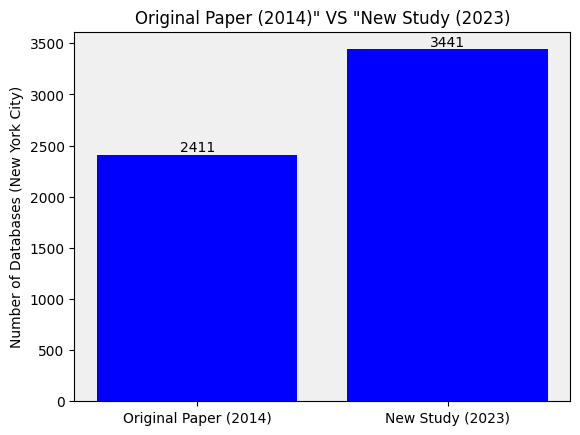

In [8]:
import matplotlib.pyplot as plt
import requests
from datetime import datetime
url = "https://api.us.socrata.com/api/catalog/v1"
domain = "data.cityofnewyork.us"

params = {
    "domains": domain,
    "search_context": domain,
    "limit": 5000
}

response = requests.get(url, params=params)
data = response.json()

count = 0;
for item in data['results']:
    count = count + 1


categories = ['Original Paper (2014)', 'New Study (2023)']
values = [2411,count]

# Creating a bar chart
plt.bar(categories, values, color='blue')

# Adding labels and title
plt.ylabel('Number of Databases (New York City)')
plt.title('Original Paper (2014)" VS "New Study (2023)')

for i, value in enumerate(values):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')

# Display the chart
plt.show()